# Model Selection

## Here, we discuss the feature selection of our model.

In [159]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [160]:
import requests
import pandas as pd

'''
banco.query('PD04682MD') # Daily interest rate of deposits in PEN, "instantaneous" spot of the yield / ... Multicolinear with tc?
banco.query('PD04701XD') # Daily price for the copper. Exogenous factor.
banco.query('PD04709XD') # EMBIG Spread, country risk indicator. Endogenous factor. Independant?
banco.query('PD04643PD') # USDPEN 11 AM Buy
banco.query('PD04644PD') # USDPEN 11 AM Bid
banco.query('PD04645PD') # USDPEN 01:30 PM Buy
banco.query('PD04646PD') # USDPEN 01:30 PM Bid
'''

series_codes = ['PD04682MD', 'PD04701XD', 'PD04709XD', 'PD04643PD', 'PD04644PD', 'PD04645PD', 'PD04646PD']

start_date = '2004-02-01'
end_date = '2024-10-01'

# Construct the URL
url = f"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{'-'.join(series_codes)}/txt/{start_date}/{end_date}"

response = requests.get(url)

with open("economic_data.txt", "wb") as file:
    file.write(response.content)



In [161]:
import numpy as np

# Read the data
df = pd.read_csv("economic_data.txt", sep="\t", na_values=["n.d."])

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

df = df.replace("n.d. ", np.nan)

# Renaming all columns
new_column_names = [
    'Date',
    'USDPEN Bid 11 AM',
    'USDPEN Buy 11 AM',
    'USDPEN Bid 1:30 PM',
    'USDPEN Buy 1:30 PM',
    'Interest Rates - Repo Operations Total',
    'Copper Price (cUS$ per pound)',
    'EMBIG Peru (variation in bps)'
]

# Rename all columns
df.columns = new_column_names

df['Date'] = df['Date'].str.replace('Ene', 'Jan')  # Change 'Abr' to 'Apr'
df['Date'] = df['Date'].str.replace('Abr', 'Apr')  # Change 'Abr' to 'Apr'
df['Date'] = df['Date'].str.replace('Ago', 'Aug')  # Change 'Ago' to 'Aug'
df['Date'] = df['Date'].str.replace('Set', 'Sep')  # No need to change this
df['Date'] = df['Date'].str.replace('Dic', 'Dec')  # Change 'Dic' to 'Dec'

# Transforming data
df['Date'] = pd.to_datetime(df['Date'], format='%d.%b.%y', dayfirst=True)

# Convert specific columns to numeric
for col in df.columns[1:7]: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned DataFrame
print("\nProcessed Data:")

print(df)

df.to_csv("economic_data_cleaned.csv", index=False)


Processed Data:
           Date  USDPEN Bid 11 AM  USDPEN Buy 11 AM  USDPEN Bid 1:30 PM  \
0    2004-02-02            3.5055            3.5075              3.5015   
1    2004-02-03            3.4966            3.4970              3.4965   
2    2004-02-04            3.4930            3.4935              3.4890   
3    2004-02-05            3.4930            3.4933              3.4931   
4    2004-02-06            3.4913            3.4914              3.4920   
...         ...               ...               ...                 ...   
5387 2024-09-25            3.7690            3.7700              3.7480   
5388 2024-09-26            3.7280            3.7290              3.7230   
5389 2024-09-27            3.7130            3.7160              3.7110   
5390 2024-09-30            3.7050            3.7070              3.7030   
5391 2024-10-01            3.7130            3.7140              3.7180   

      USDPEN Buy 1:30 PM  Interest Rates - Repo Operations Total  \
0             

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set index
df.set_index('Date', inplace=True)

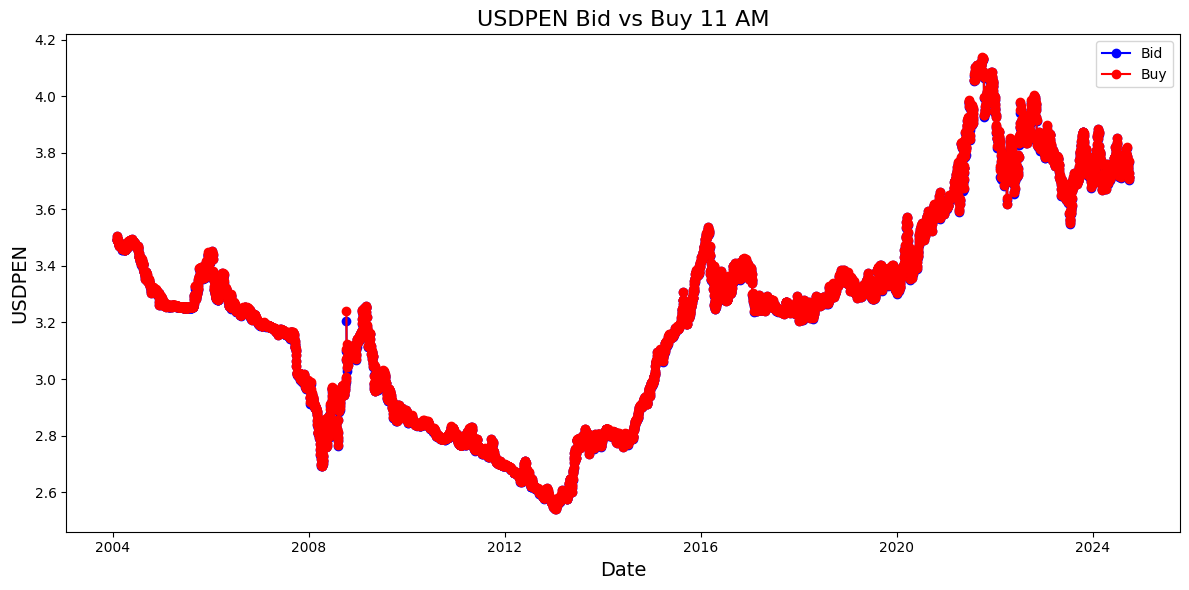

In [163]:
# Plotting USDPEN
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['USDPEN Bid 11 AM'], marker='o', label='Bid', color='blue')
plt.plot(df.index, df['USDPEN Buy 11 AM'], marker='o', label='Buy', color='red')

# Adding titles and labels
plt.title('USDPEN Bid vs Buy 11 AM', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('USDPEN', fontsize=14)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

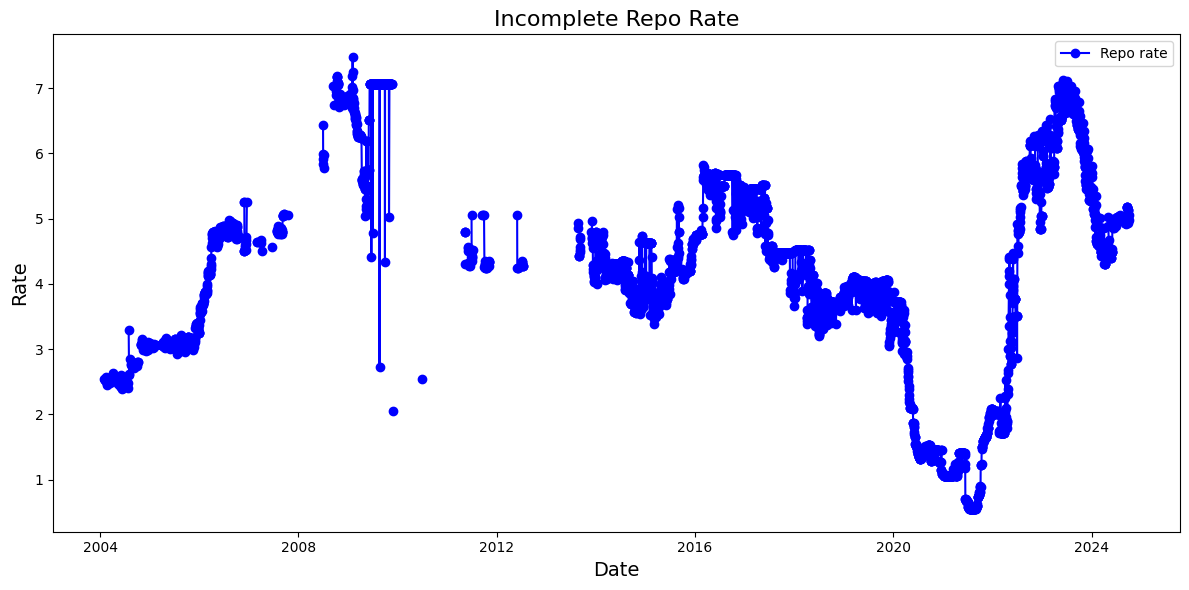

In [164]:
# Plotting incomplete Overnight rate
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Interest Rates - Repo Operations Total'], marker='o', label='Repo rate', color='blue')

# Adding titles and labels
plt.title('Incomplete Repo Rate', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

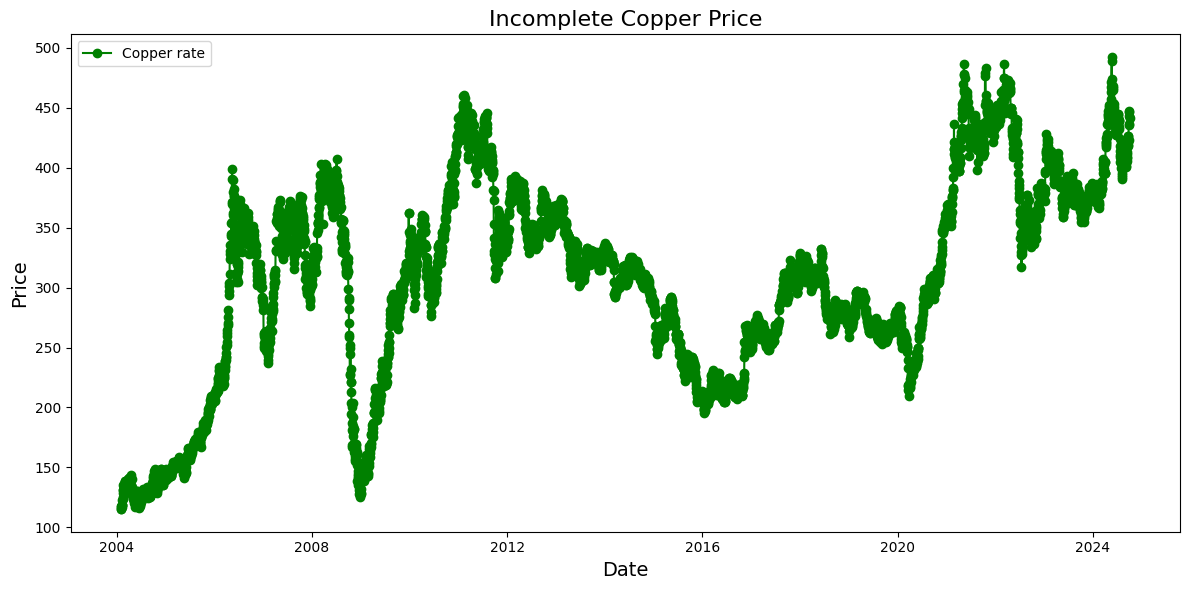

In [165]:
# Plotting incomplete Copper Prices 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Copper Price (cUS$ per pound)'], marker='o', label='Copper rate', color='Green')

# Adding titles and labels
plt.title('Incomplete Copper Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Assuming a smooth trend,in the long term we can use cubic splines to interpolate all missing data. To be discussed.

In [166]:
'''from scipy.interpolate import CubicSpline'''

'from scipy.interpolate import CubicSpline'

## Data classification